# Gold Price Prediction

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

### Data Collection and Processing 

In [3]:
#loading the csv data to pandas dataframe
gold_data = pd.read_csv('gld_price_data.csv')

In [4]:
# Printing first 5 rows of the data
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [5]:
# print the last 5 rows of the data
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [6]:
# number of rows and columns
gold_data.shape

(2290, 6)

In [7]:
# Getting the basic info of the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [8]:
# Checking the number of missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [9]:
# Statistical measures of the data 
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


### find the correlation of the data 
### 1.Positive Correlation
### 2.Negative Correlation

In [10]:
correlation = gold_data.corr()

<AxesSubplot:>

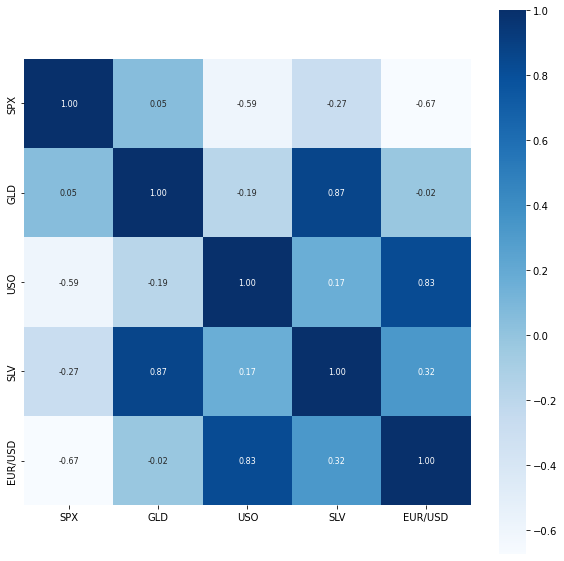

In [11]:
# Heatmap for correlation
plt.figure(figsize = (10,10))
sns.heatmap(correlation, square= True, fmt='.1f', annot=True, annot_kws= {'size':8}, cmap='Blues')    

In [26]:
# Correlation values og GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\MSI\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GLD', ylabel='Density'>

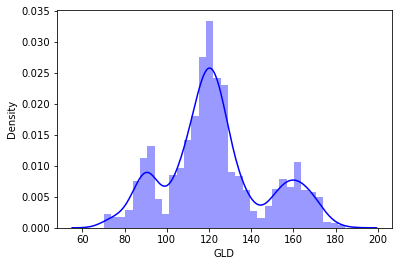

In [31]:
# Checkig the distribution of the GLD price 
sns.distplot(gold_data['GLD'], color= 'Blue')

# Splitting the features and Target

In [32]:
X = gold_data.drop(['Date','GLD'], axis = 1)
Y = gold_data['GLD']

In [34]:
print(X)
print(Y)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]
0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


### Splitting the data into Train and Test Data

In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 2)

##### Model Training:
##### Random Forest Regressor 

In [36]:
regressor = RandomForestRegressor(n_estimators= 100)

##### Training the model

In [37]:
regressor.fit(X_train,Y_train)

RandomForestRegressor()

##### Model Evaluation

In [39]:
# Prediction On Test Data
test_data_prediction = regressor.predict(X_test)
print(test_data_prediction)

[168.8177997   82.10289994 115.71730025 127.5277006  120.83090119
 154.6583984  150.5877981  126.15440045 117.43399864 125.8974007
 116.73370079 171.99050063 141.84469854 167.84239818 115.25170007
 117.68470057 139.70120271 170.35800087 159.01460302 157.68549945
 155.1214002  125.62280032 175.99889963 157.06190402 125.20950046
  93.71499981  77.49420017 120.34330009 119.05779886 167.54069947
  88.13470101 125.04989968  91.15800077 117.70510021 121.13999915
 135.84110085 115.20440137 115.17340117 146.55929929 107.18120077
 104.39230251  87.15709783 126.46480032 117.91939999 153.87689895
 119.66860021 108.30129972 108.0100982   93.03679996 127.04569822
  75.12960037 113.61519964 121.23489988 111.21129907 118.81569889
 120.4645995  159.51370017 166.79680131 147.11429717  85.6334982
  94.51880036  86.76449899  90.60289975 118.90510067 126.45120049
 127.45679981 169.35929942 122.23599954 117.2885992   98.76620054
 168.41290194 143.28629797 131.9228025  121.26020201 120.65479969
 119.6446003

In [42]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print(error_score)

0.9897507131684105


##### Compare the actual values and Predicted Values

In [43]:
Y_test = list(Y_test)

<function matplotlib.pyplot.show(close=None, block=None)>

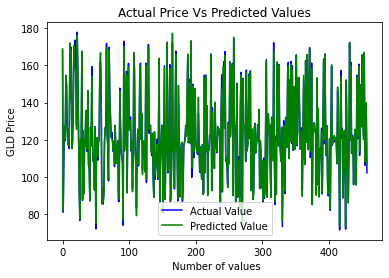

In [47]:
plt.plot(Y_test, color = 'Blue', label = 'Actual Value')
plt.plot(test_data_prediction, color ='Green', label = 'Predicted Value')
plt.title('Actual Price Vs Predicted Values')
plt.xlabel(' Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show